In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import time

imgname1 = './Else/TitechIMG.jpg'
imgname2 = './Else/TitechIMG_test01.jpg'

# 基于BFmatcher的SIFT实现

In [2]:
time_start=time.time()

sift = cv2.xfeatures2d.SIFT_create()

img1 = cv2.imread(imgname1)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) #灰度处理图像
kp1, des1 = sift.detectAndCompute(img1,None)   #des是描述子

img2 = cv2.imread(imgname2)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)#灰度处理图像
kp2, des2 = sift.detectAndCompute(img2,None)  #des是描述子

time_end=time.time()

print('time cost',time_end-time_start,'s')

error: OpenCV(4.4.0) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-tnokoph3/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


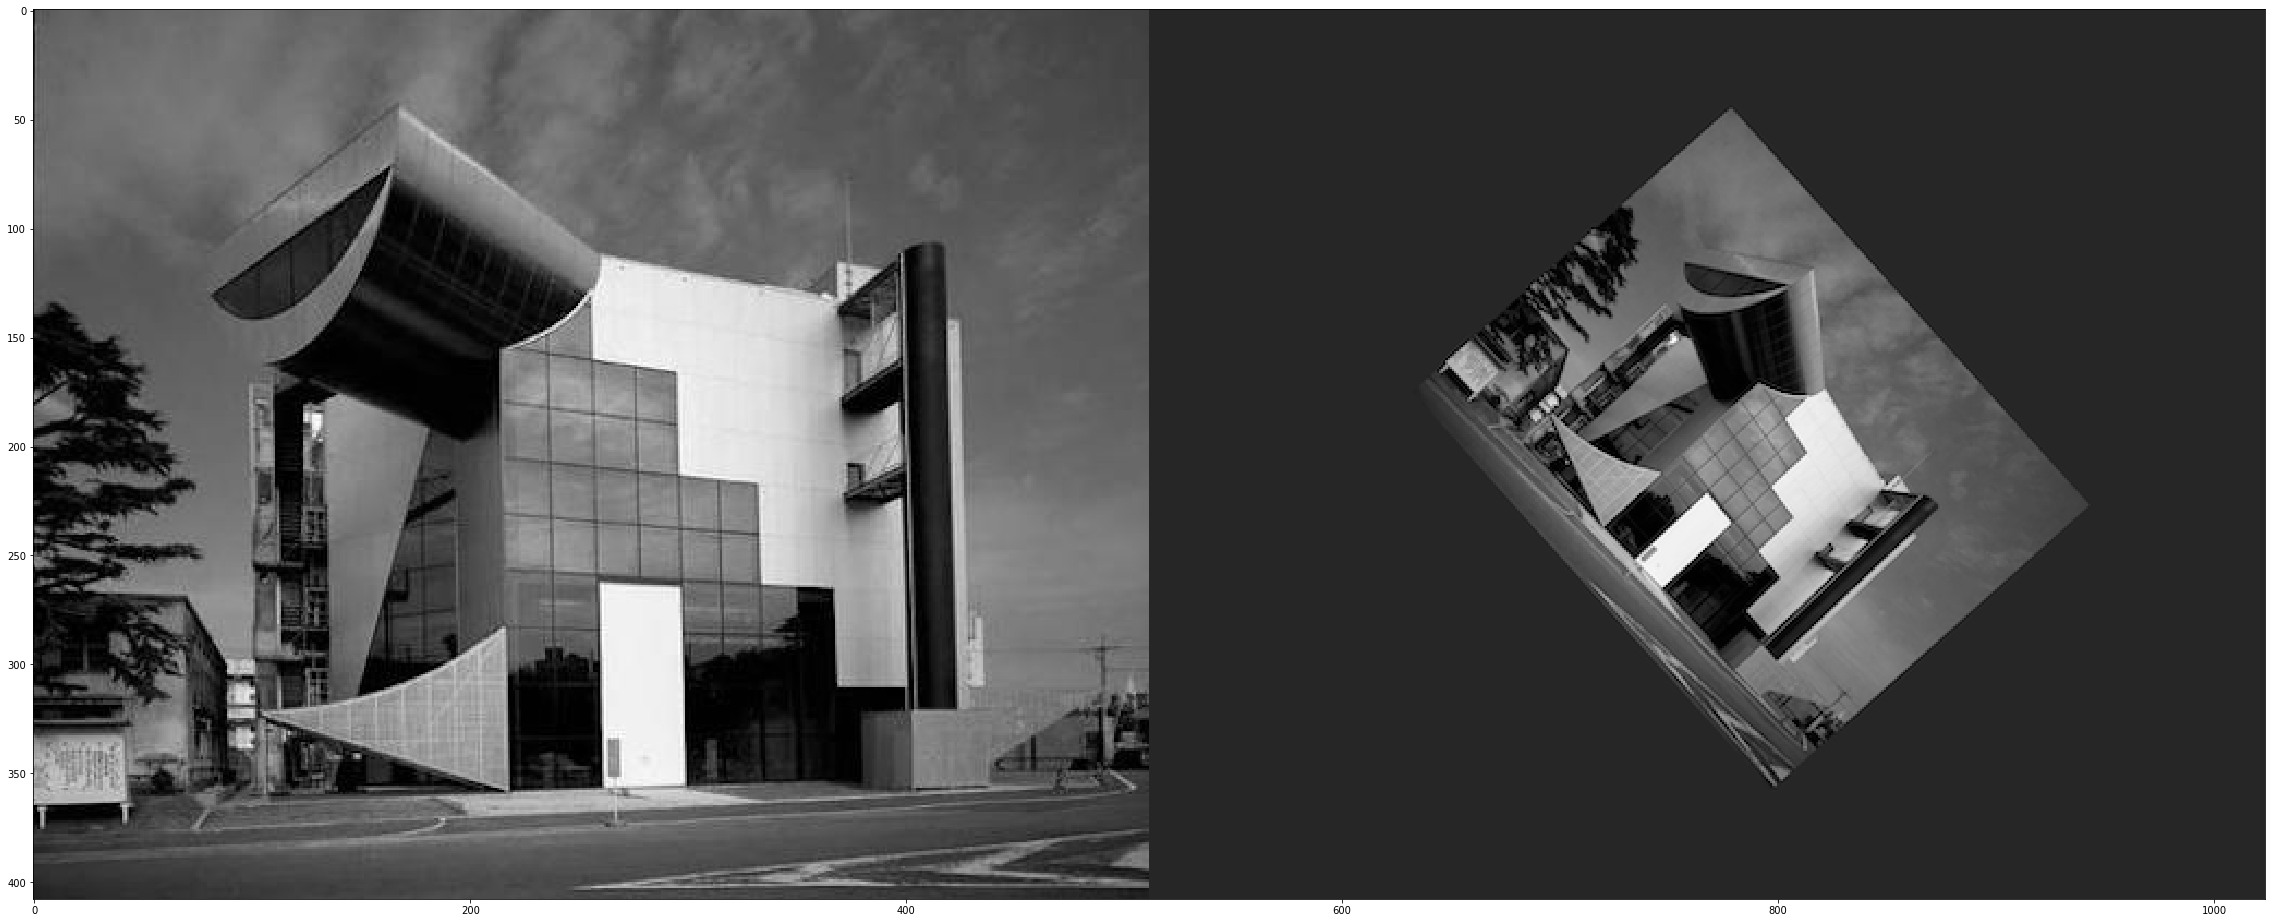

In [9]:
hmerge = np.hstack((gray1, gray2)) #水平拼接
plt.figure(figsize=(40,40))
plt.imshow(cv2.cvtColor(hmerge, cv2.COLOR_BGR2RGB))
plt.show()

# cv2.imshow("gray", hmerge) #拼接显示为gray
# k = cv2.waitKey(5000) # waitkey代表读取键盘的输入，括号里的数字代表等待多长时间，单位ms。 0代表一直等待
# if k ==27:     # 键盘上Esc键的键值
#     cv2.destroyAllWindows() 

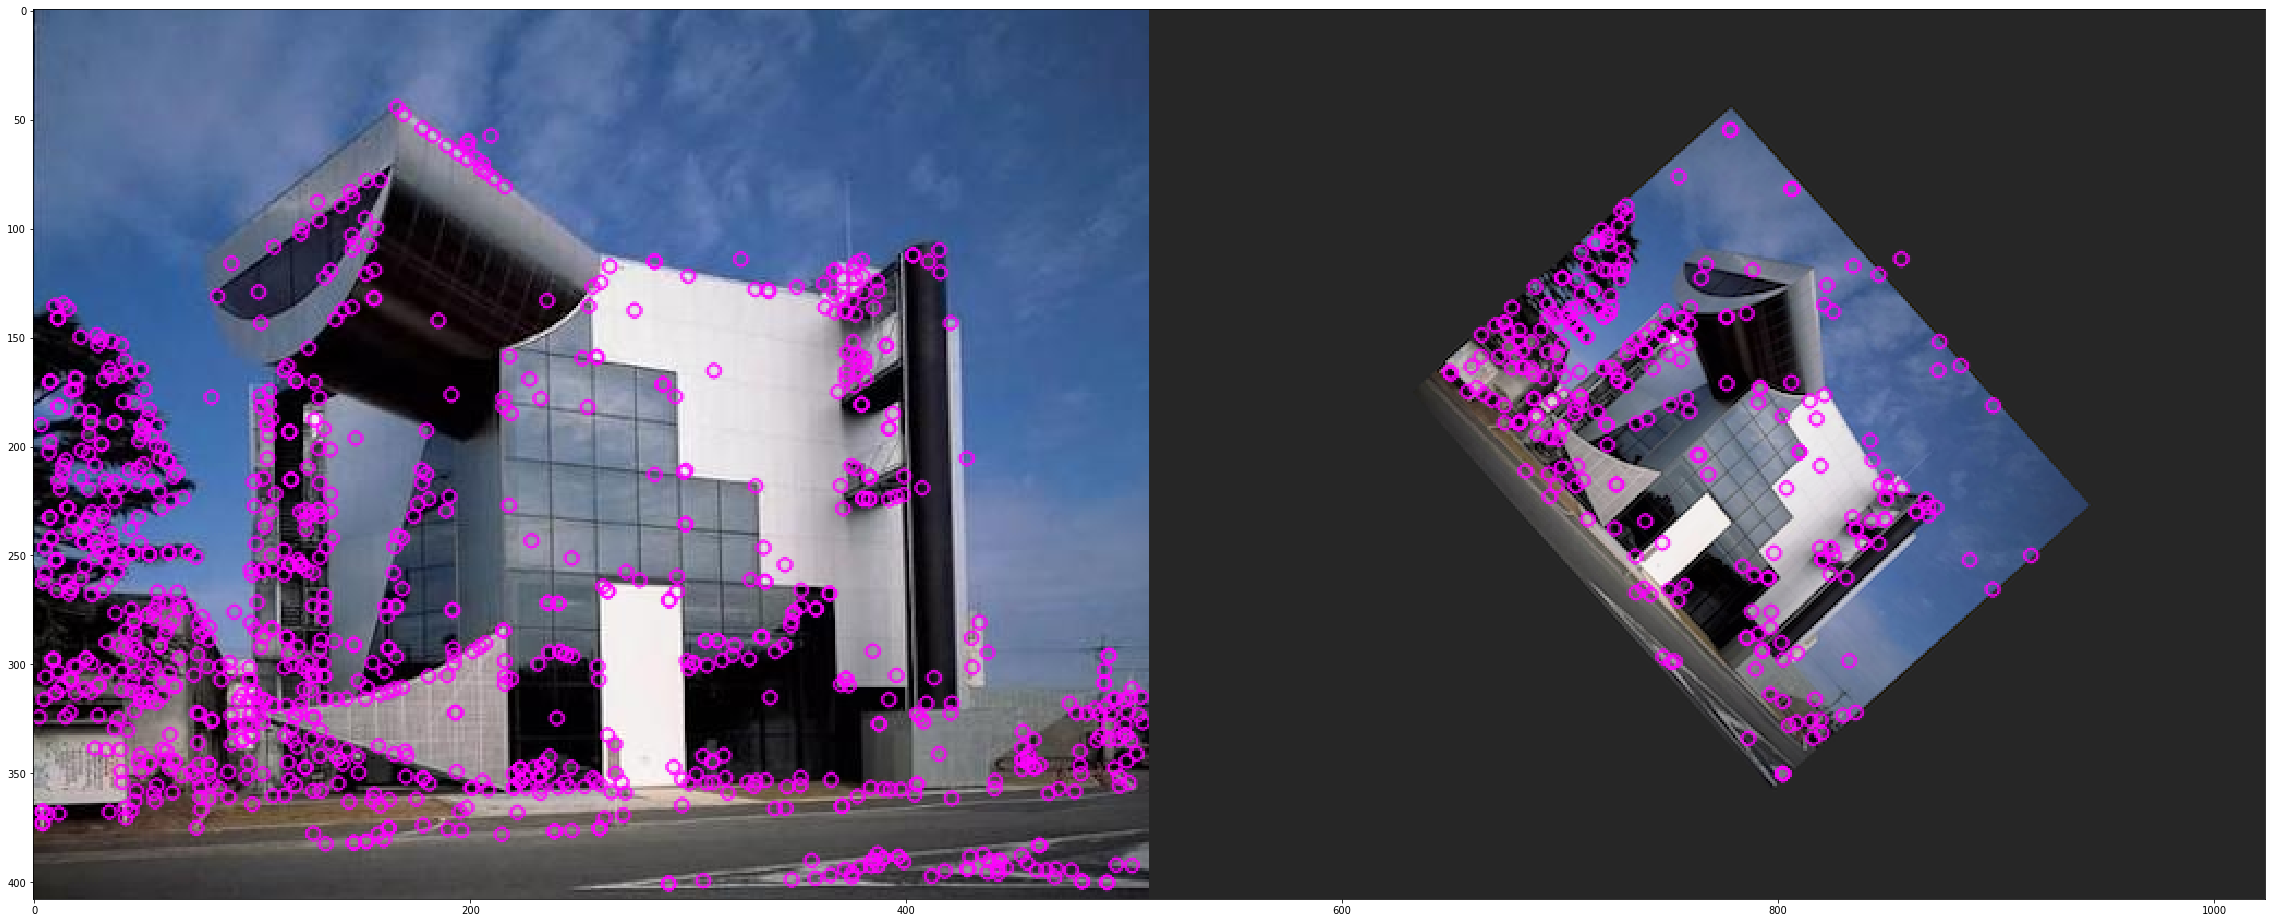

In [4]:
img3 = cv2.drawKeypoints(img1,kp1,gray1,color=(255,0,255)) #画出特征点，并显示为红色圆圈
img4 = cv2.drawKeypoints(img2,kp2,gray2,color=(255,0,255)) #画出特征点，并显示为红色圆圈
hmerge = np.hstack((img3, img4)) #水平拼接

# cv2.imshow("point", hmerge) #拼接显示为gray
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.figure(figsize=(40,40))
plt.imshow(cv2.cvtColor(hmerge, cv2.COLOR_BGR2RGB))
plt.show()

In [5]:
time_start=time.time()

# BFMatcher解决匹配
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
time_end=time.time()
print('time cost',time_end-time_start,'s')

# # 调整ratio
# good = []
# for m,n in matches:
#     if m.distance < 0.75*n.distance:
#         good.append([m])

# img5 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,flags=2)

time_start=time.time()
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
time_end=time.time()
print('time cost',time_end-time_start,'s')

time cost 0.04411482810974121 s


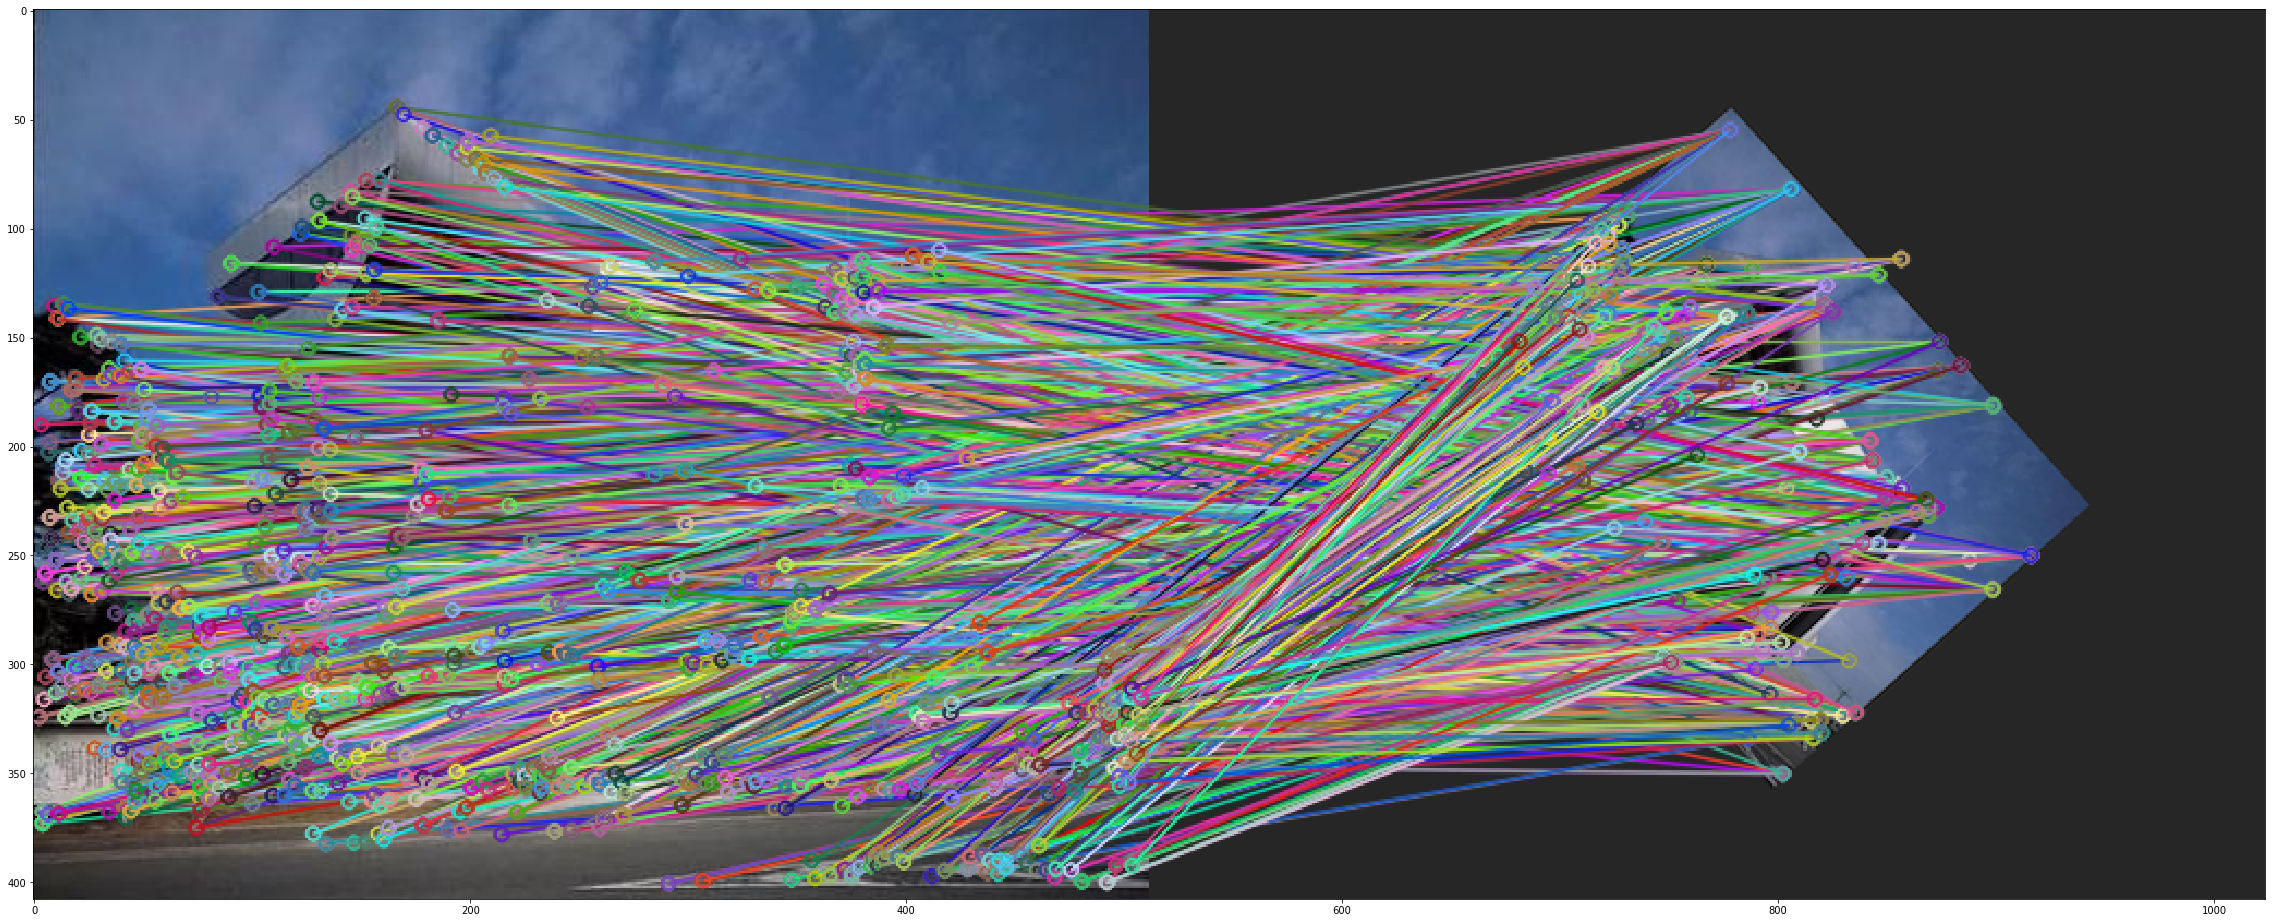

In [6]:
# cv2.imshow("BFmatch", img5)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.figure(figsize=(40,40))
plt.imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))
plt.show()

# 基于FlannBasedMatcher的SIFT实现

In [7]:
time_start=time.time()
sift = cv2.xfeatures2d.SIFT_create()

# FLANN 参数设计
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params,search_params)

img1 = cv2.imread(imgname1)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) #灰度处理图像
kp1, des1 = sift.detectAndCompute(img1,None)#des是描述子

img2 = cv2.imread(imgname2)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
kp2, des2 = sift.detectAndCompute(img2,None)

time_end=time.time()
print('time cost',time_end-time_start,'s')

time cost 0.10702300071716309 s


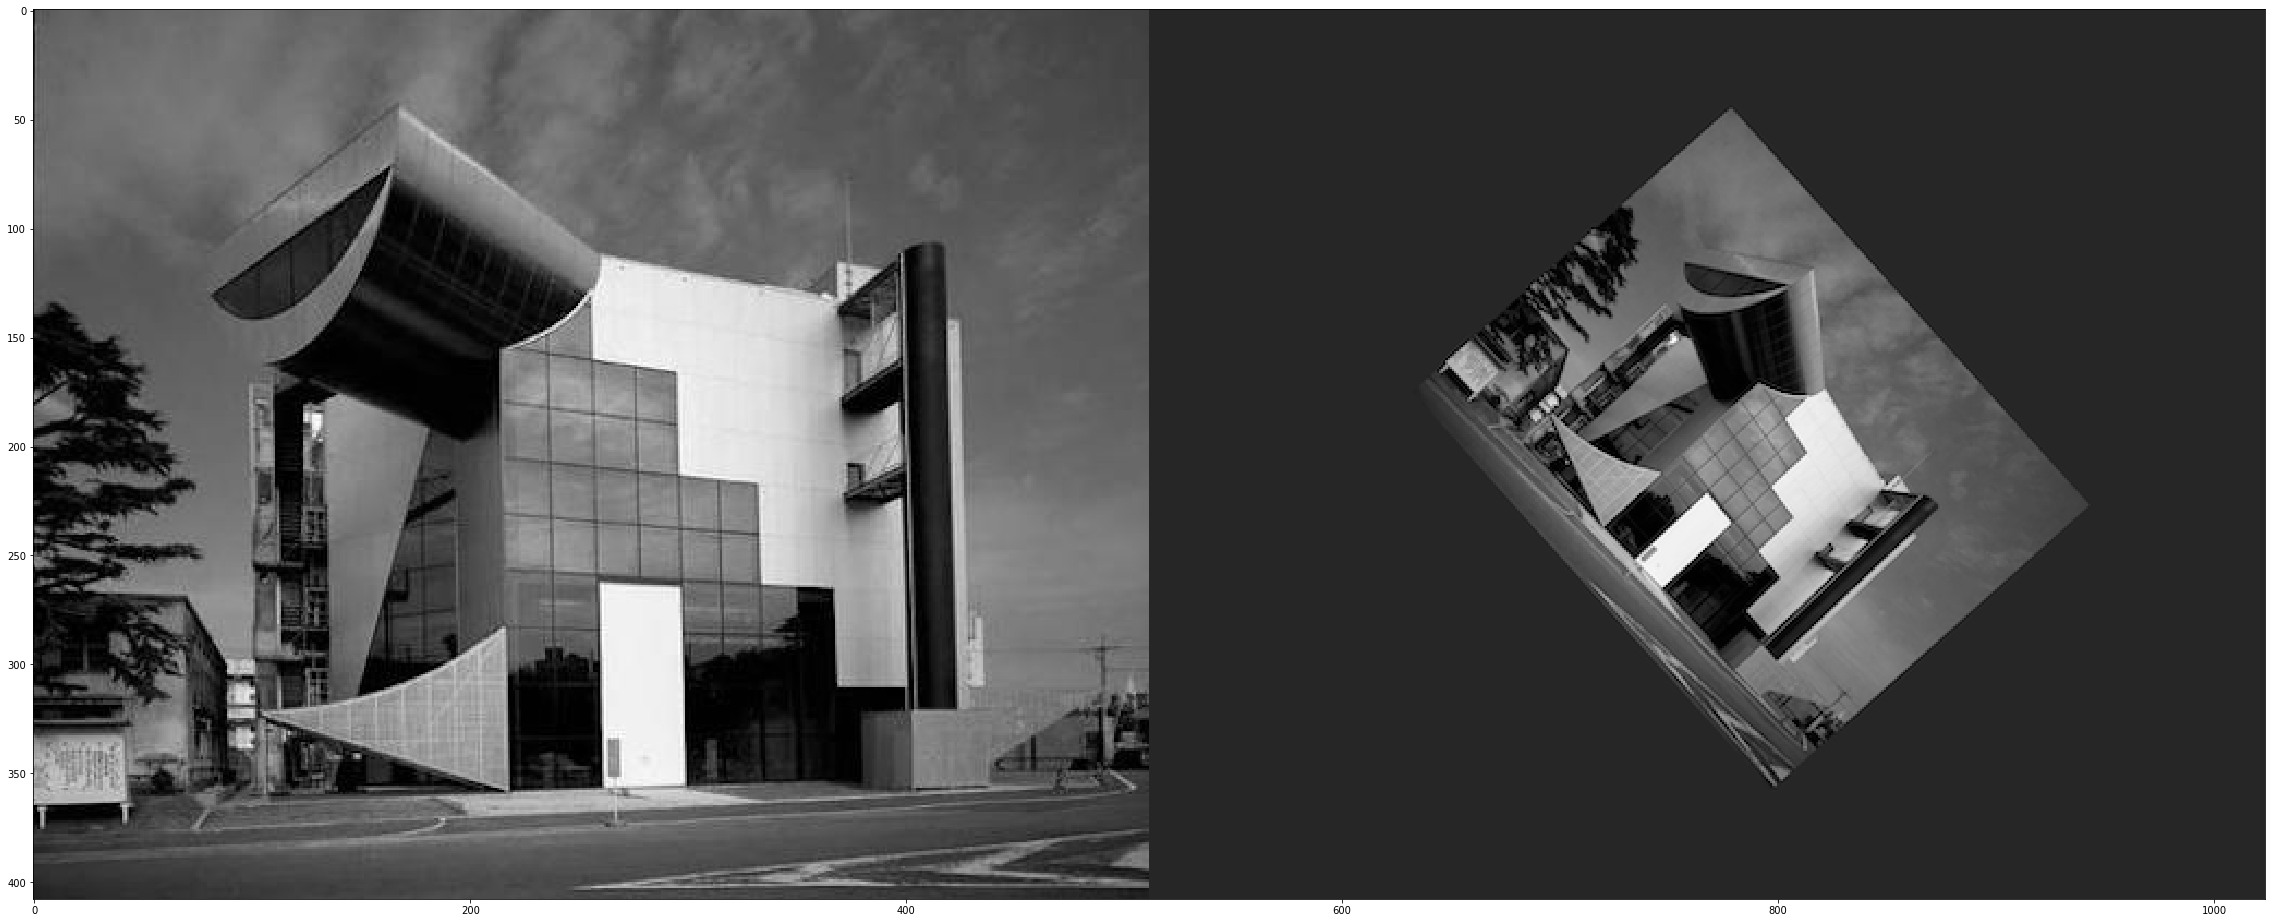

In [8]:
hmerge = np.hstack((gray1, gray2)) #水平拼接
# cv2.imshow("gray", hmerge) #拼接显示为gray
# cv2.waitKey(0)

plt.figure(figsize=(40,40))
plt.imshow(cv2.cvtColor(hmerge, cv2.COLOR_BGR2RGB))
plt.show()

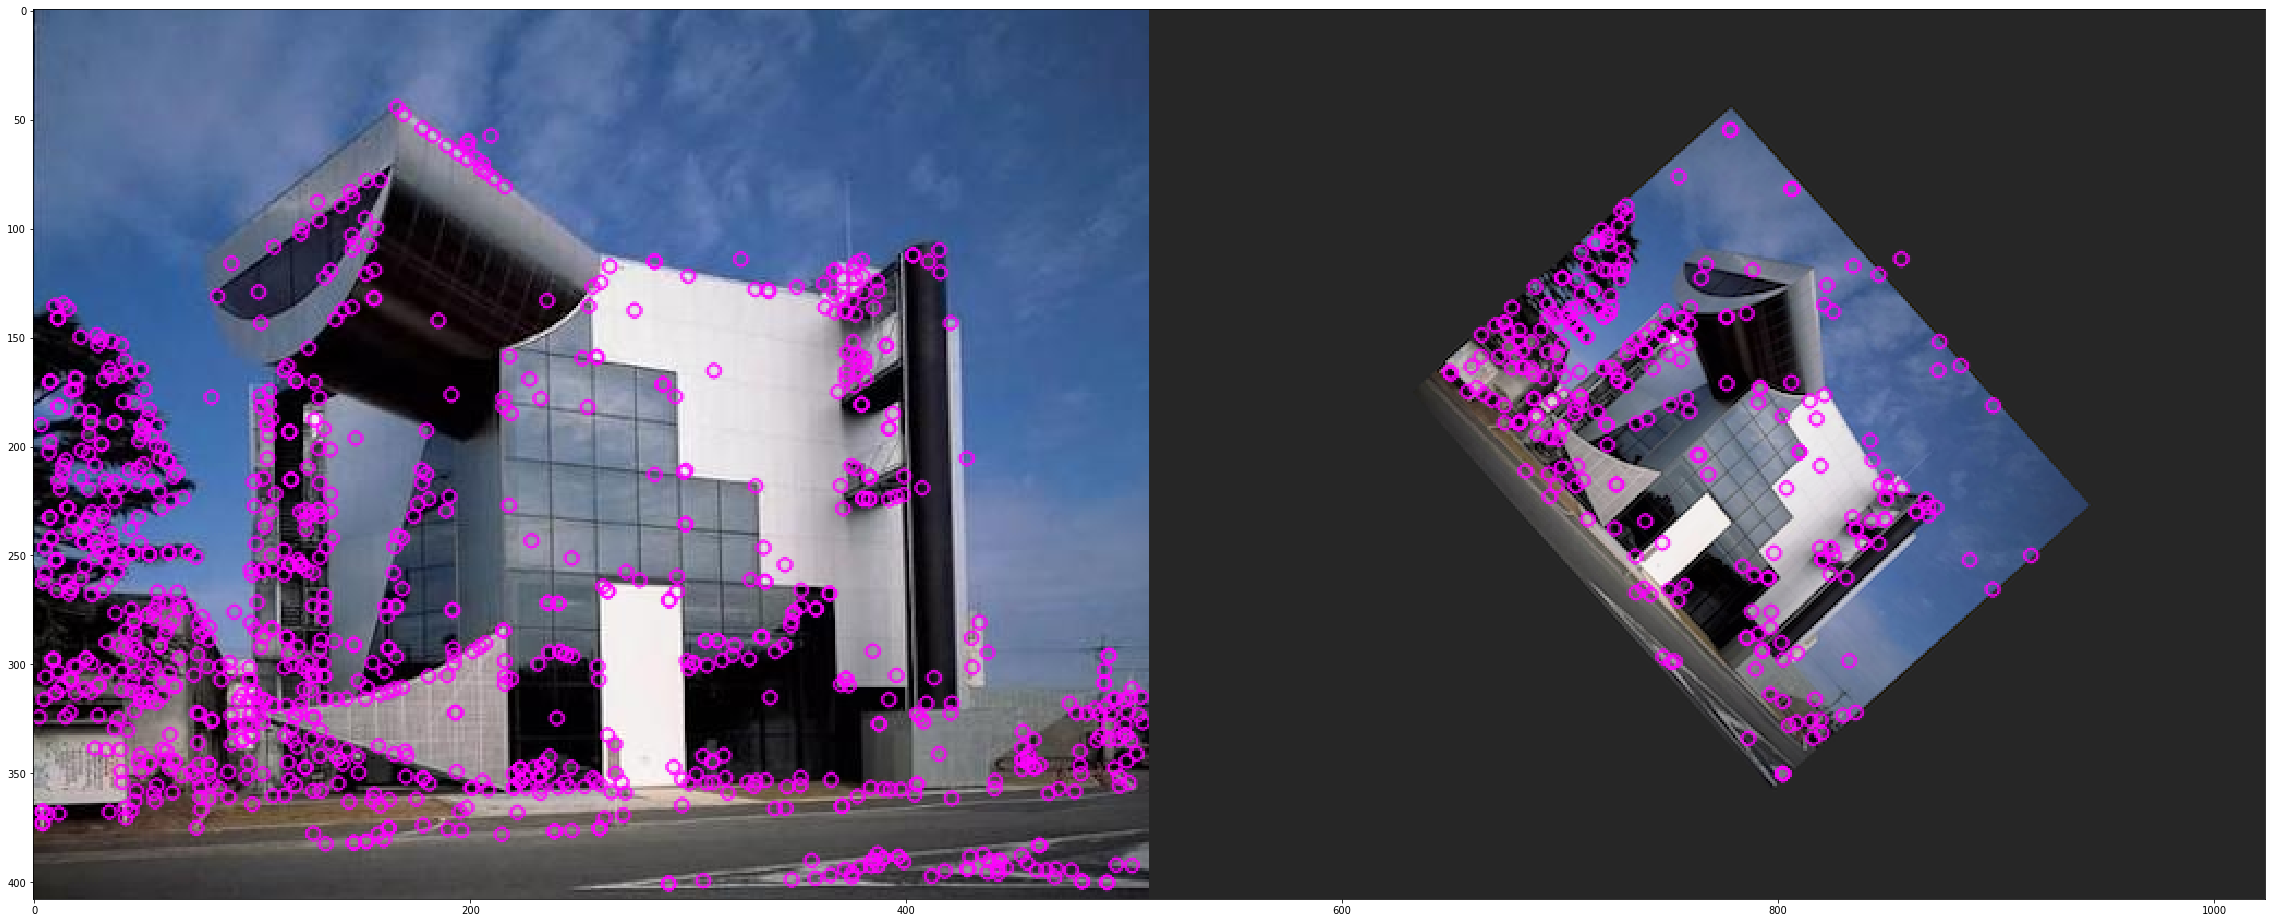

In [9]:
img3 = cv2.drawKeypoints(img1,kp1,img1,color=(255,0,255))
img4 = cv2.drawKeypoints(img2,kp2,img2,color=(255,0,255))

hmerge = np.hstack((img3, img4)) #水平拼接
# cv2.imshow("point", hmerge) #拼接显示为gray
# cv2.waitKey(0)

plt.figure(figsize=(40,40))
plt.imshow(cv2.cvtColor(hmerge, cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
time_start=time.time()
matches = flann.knnMatch(des1,des2,k=2)
matchesMask = [[0,0] for i in range(len(matches))]

good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append([m])

img5 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,flags=2)

time_end=time.time()
print('time cost',time_end-time_start,'s')

time cost 0.06416893005371094 s


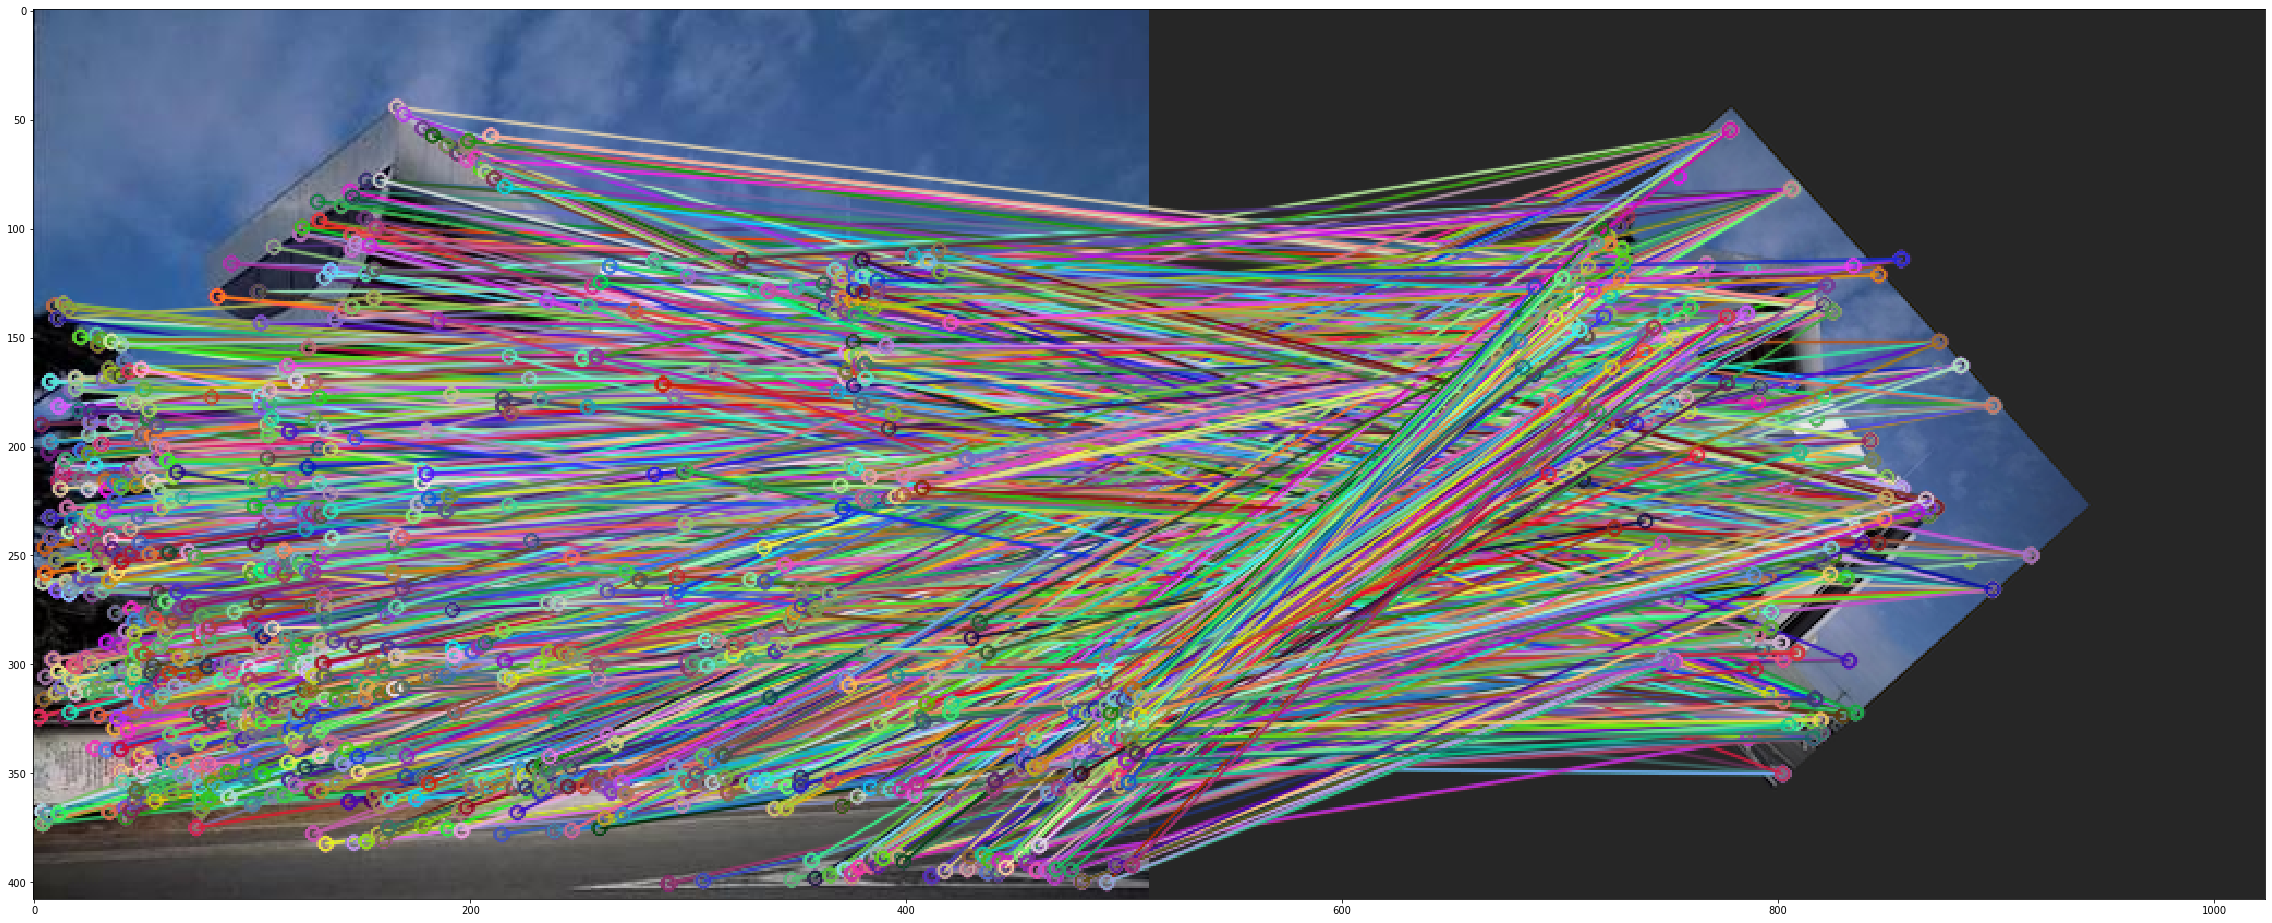

In [11]:
# cv2.imshow("FLANN", img5)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.figure(figsize=(40,40))
plt.imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))
plt.show()

# 基于FlannBasedMatcher的SURF实现

In [6]:
surf = cv2.xfeatures2d.SURF_create()

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params,search_params)

img1 = cv2.imread(imgname1)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) #灰度处理图像
kp1, des1 = surf.detectAndCompute(img1,None)#des是描述子

img2 = cv2.imread(imgname2)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
kp2, des2 = surf.detectAndCompute(img2,None)

hmerge = np.hstack((gray1, gray2)) #水平拼接
cv2.imshow("gray", hmerge) #拼接显示为gray
cv2.waitKey(0)

In [ ]:
img3 = cv2.drawKeypoints(img1,kp1,img1,color=(255,0,255))
img4 = cv2.drawKeypoints(img2,kp2,img2,color=(255,0,255))

hmerge = np.hstack((img3, img4)) #水平拼接
cv2.imshow("point", hmerge) #拼接显示为gray
cv2.waitKey(0)

In [ ]:
matches = flann.knnMatch(des1,des2,k=2)

good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append([m])
img5 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)
cv2.imshow("SURF", img5)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 基于BFMatcher的ORB实现

In [7]:
time_start=time.time()

orb = cv2.ORB_create()

img1 = cv2.imread(imgname1)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) #灰度处理图像
kp1, des1 = orb.detectAndCompute(img1,None)#des是描述子

img2 = cv2.imread(imgname2)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
kp2, des2 = orb.detectAndCompute(img2,None)

time_end=time.time()
print('time cost',time_end-time_start,'s')

time cost 0.020589113235473633 s


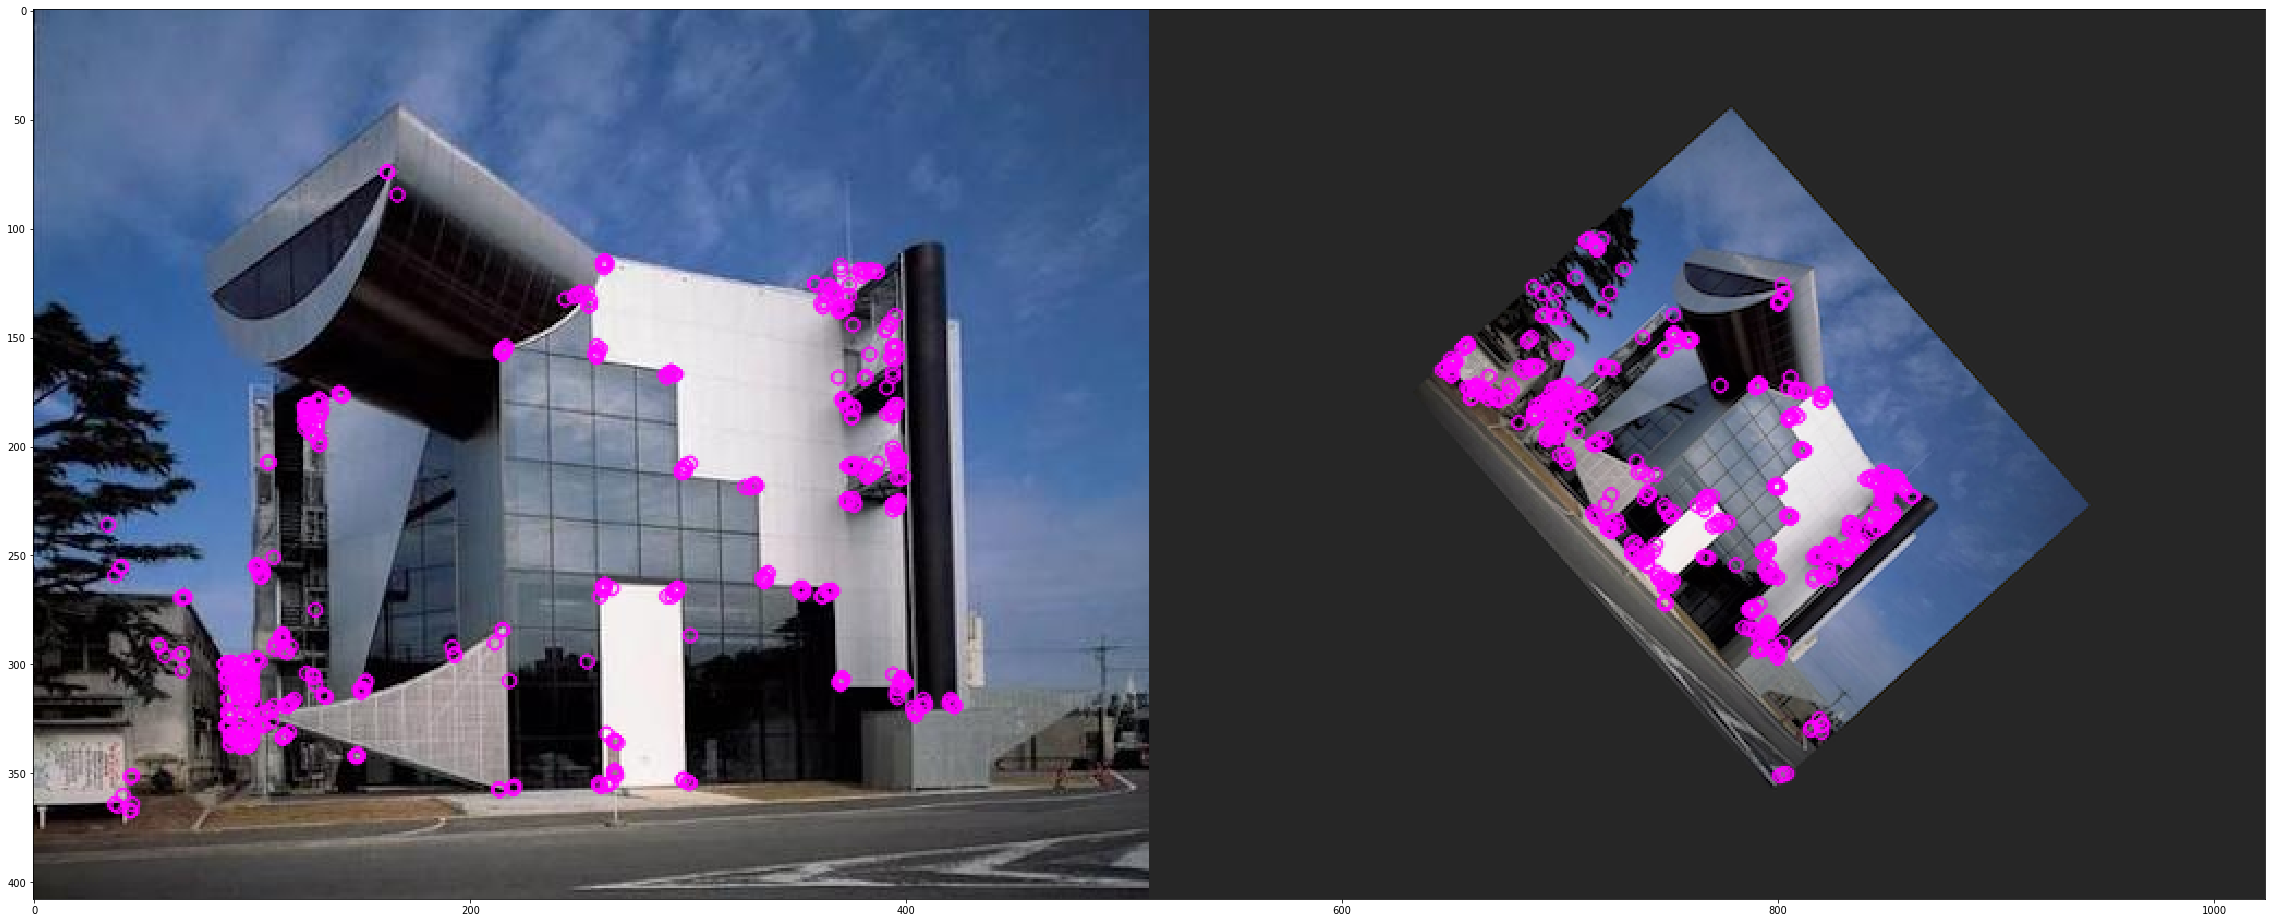

In [9]:
img3 = cv2.drawKeypoints(img1,kp1,img1,color=(255,0,255))
img4 = cv2.drawKeypoints(img2,kp2,img2,color=(255,0,255))

hmerge = np.hstack((img3, img4)) #水平拼接
# cv2.imshow("point", hmerge) #拼接显示为gray
# cv2.waitKey(0)

plt.figure(figsize=(40,40))
plt.imshow(cv2.cvtColor(hmerge, cv2.COLOR_BGR2RGB))
plt.show()

In [19]:
time_start=time.time()
# BFMatcher解决匹配
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
# 调整ratio
good = []
for m,n in matches:
    if m.distance < 0.8*n.distance:
        good.append([m])

img5 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

time_end=time.time()
print('time cost',time_end-time_start,'s')

time cost 0.005834102630615234 s


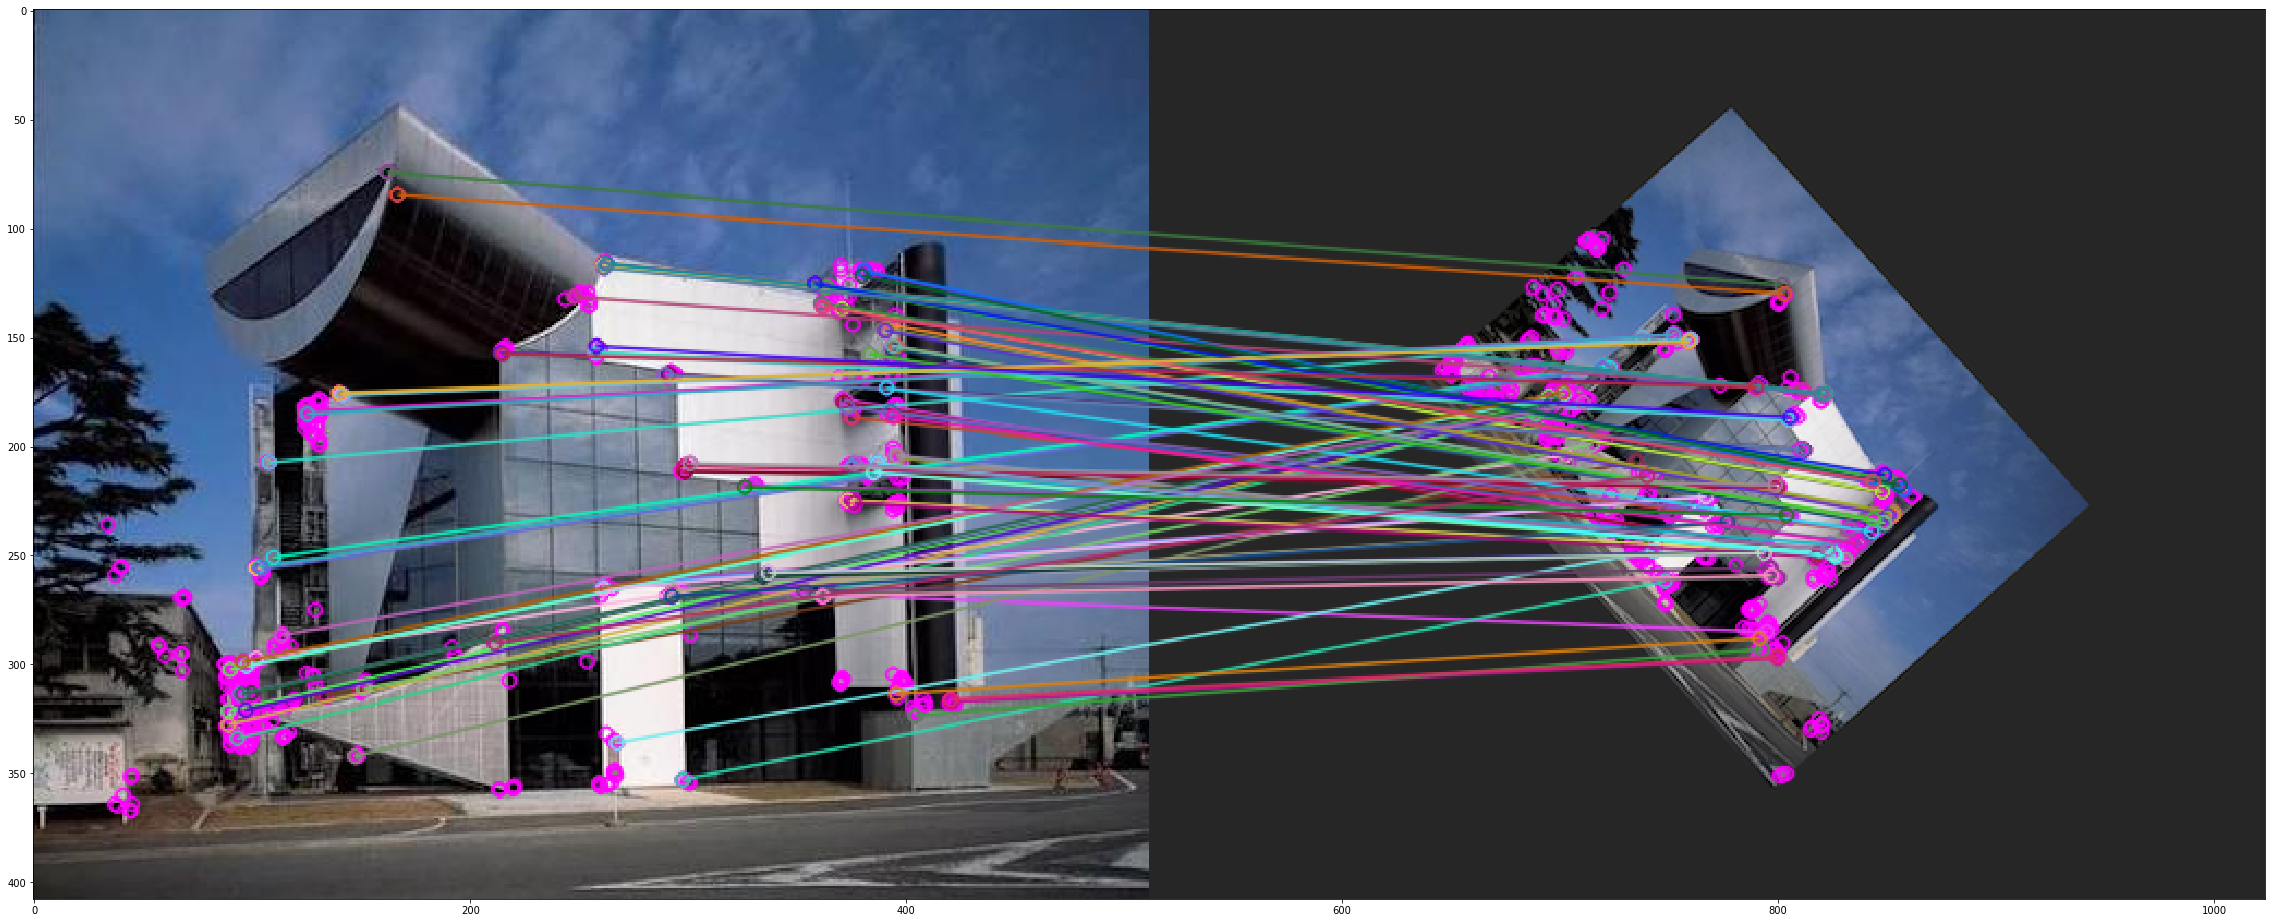

In [20]:
# cv2.imshow("ORB", img5)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.figure(figsize=(40,40))
plt.imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))
plt.show()

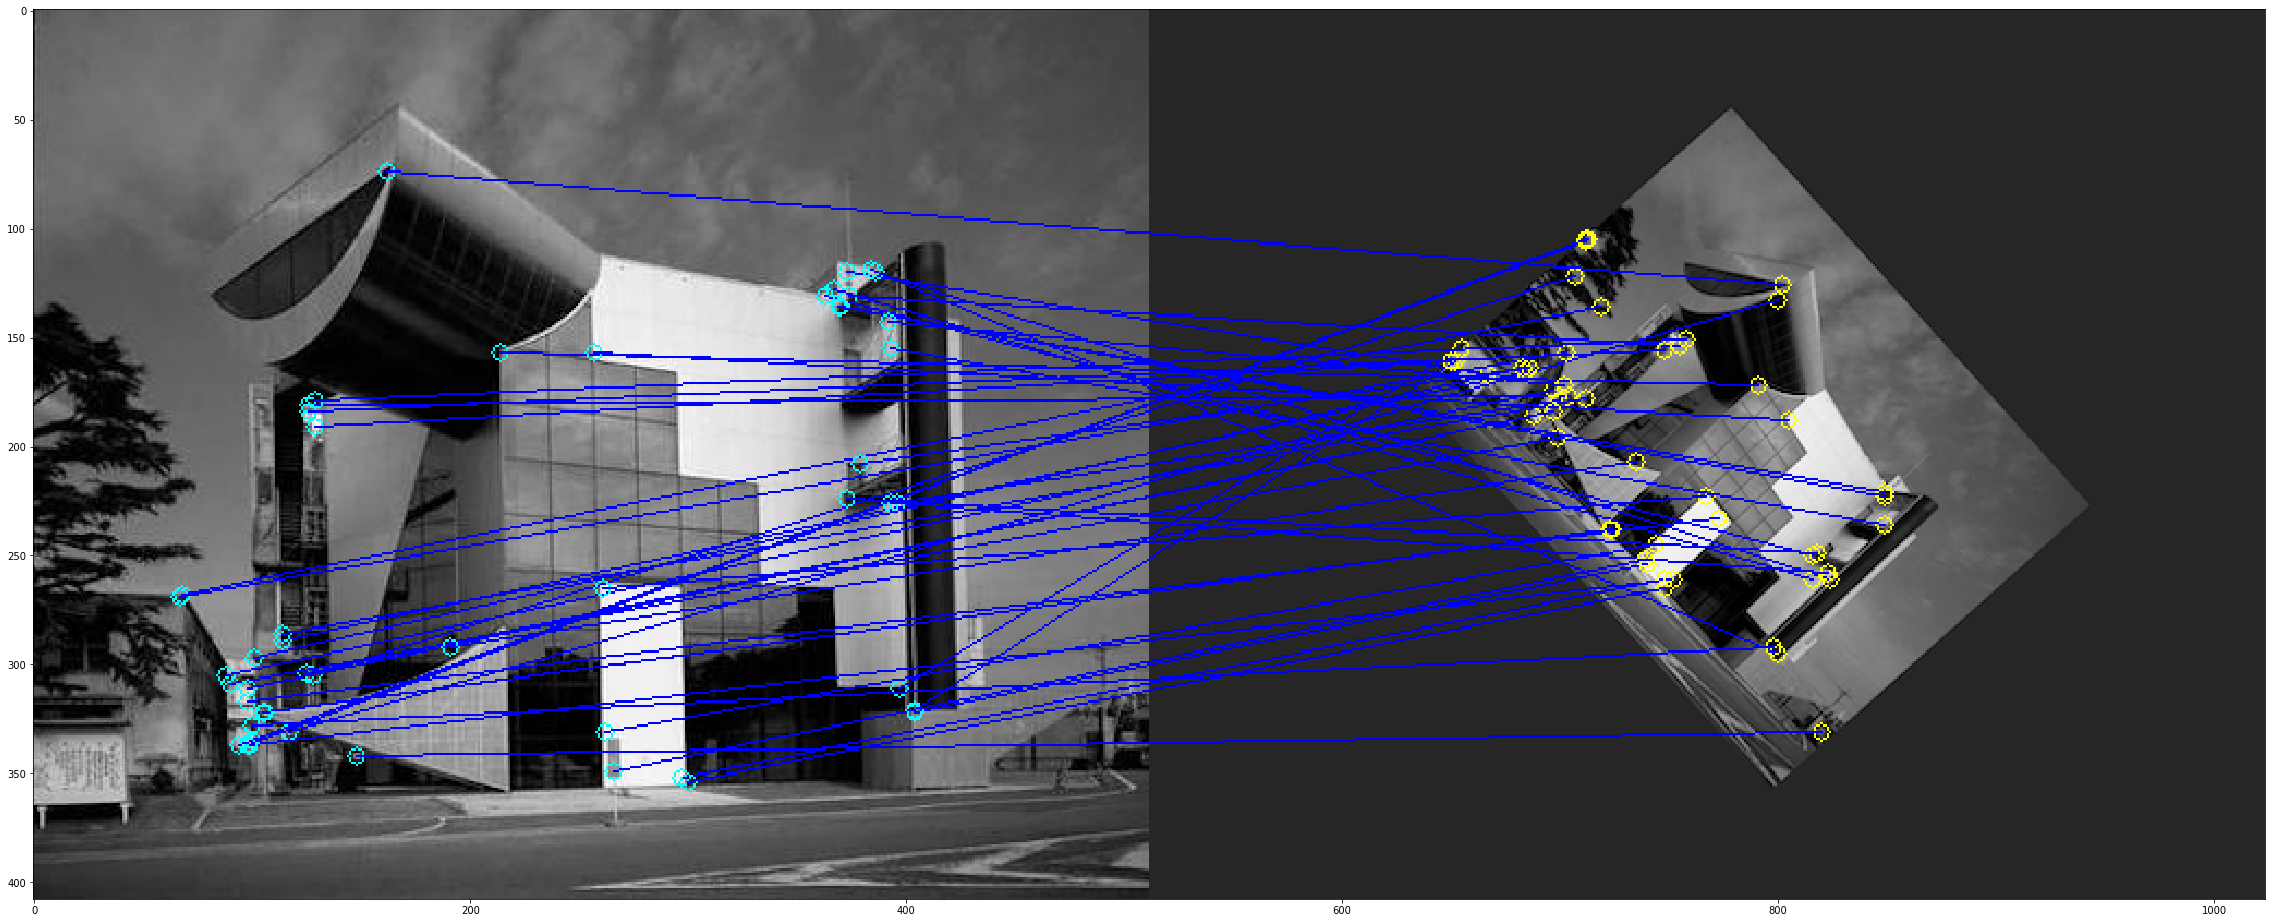

In [3]:
#!/usr/bin/env.python
# coding=gbk 支持中文注释
from matplotlib import pyplot as plt
import numpy as np
import cv2
img1=cv2.imread('TitechIMG.jpg',0)
img2=cv2.imread('TitechIMG_test01.jpg',0)

#定义函数
def drawMatches(img1, kp1, img2, kp2, matches):
    rows1=img1.shape[0]#height(rows) of image
    cols1=img1.shape[1]#width(colums) of image
    #shape[2]#the pixels value is made up of three primary colors
    rows2=img2.shape[0]
    cols2=img2.shape[1]
 
# 初始化输出的新图像，将两幅实验图像拼接在一起，便于画出特征点匹配对
    out=np.zeros((max([rows1,rows2]),cols1+cols2,3),dtype='uint8')
 
    out[:rows1,:cols1] = np.dstack([img1, img1, img1])#Python切片特性，初始化out中img1，img2的部分
    out[:rows2,cols1:] = np.dstack([img2, img2, img2])#dstack,对array的depth方向加深
 
    for mat in matches:
        img1_idx=mat.queryIdx
        img2_idx=mat.trainIdx
 
        (x1,y1)=kp1[img1_idx].pt
        (x2,y2)=kp2[img2_idx].pt
 
        cv2.circle(out,(int(x1),int(y1)),4,(255,255,0),1)#蓝绿色点，半径是4
        cv2.circle(out, (int(x2) + cols1, int(y2)), 4, (0, 255, 255), 1)#绿加红得黄色点
        cv2.line(out, (int(x1), int(y1)), (int(x2) + cols1, int(y2)), (255, 0, 0), 1)#蓝色连线
 
    return out
 
# 检测器。ORB 直接换成AKAZE也可以，KAZE需要将BFMatcher中汉明距离换成cv2.NORM_L2
detector = cv2.ORB_create()
 
kp1 = detector.detect(img1, None)
kp2 = detector.detect(img2, None)
kp1, des1 = detector.compute(img1, kp1)#计算出描述子
kp2, des2 = detector.compute(img2, kp2)
 
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)#暴力匹配
matches = bf.match(des1, des2)
img3 = drawMatches(img1, kp1, img2, kp2, matches[:50])#找到50个匹配对
 
plt.figure(figsize=(40,40))
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.show()